Data for Ibovespa (^BVSP) fetched successfully!
Data for Dow Jones Industrial Average (DJIA) (^DJI) fetched successfully!
Data for S&P 500 (^GSPC) fetched successfully!
Data for NASDAQ Composite (^IXIC) fetched successfully!
Data for FTSE 100 (^FTSE) fetched successfully!
Data for DAX (^GDAXI) fetched successfully!
Data for CAC 40 (^FCHI) fetched successfully!
Data for Nikkei 225 (^N225) fetched successfully!
Data for Hang Seng (^HSI) fetched successfully!
Data for Shanghai Composite (000001.SS) fetched successfully!


/tmp/ipykernel_8636/1056997689.py:35: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/comparacao_indices_corrigido.png'

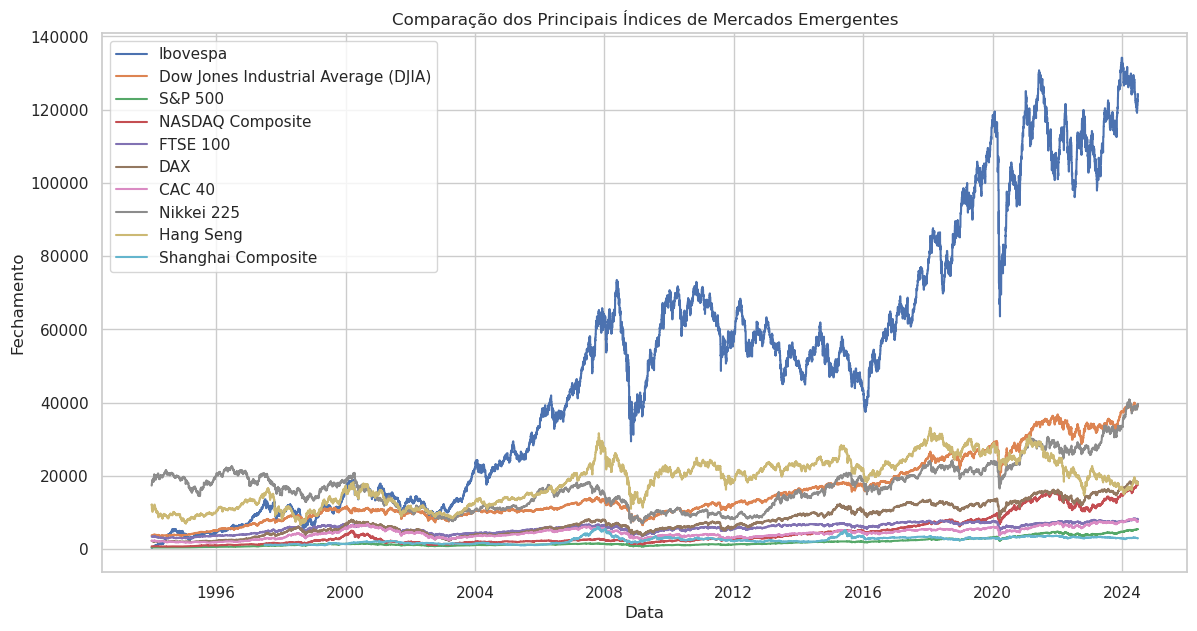

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de índices para comparação
indices = {
   "Ibovespa": "^BVSP",
    "Dow Jones Industrial Average (DJIA)": "^DJI",
    "S&P 500": "^GSPC",
    "NASDAQ Composite": "^IXIC",
    "FTSE 100": "^FTSE",
    "DAX": "^GDAXI",
    "CAC 40": "^FCHI",
    "Nikkei 225": "^N225",
    "Hang Seng": "^HSI",
    "Shanghai Composite": "000001.SS"
    #"BSE Sensex": "^BSESN"
}

# Dicionário para armazenar os DataFrames
data_frames = {}

# Buscar dados históricos dos índices e armazenar em DataFrames
for index_name, ticker in indices.items():
    index_data = yf.Ticker(ticker)
    hist = index_data.history(start = '1994-01-01', end = '2024-07-01')  # Buscar dados dos últimos 5 anos
    data_frames[index_name] = hist["Close"]  # Armazenar apenas a coluna de fechamento
    print(f"Data for {index_name} ({ticker}) fetched successfully!")

# Criar um DataFrame combinado para comparação
combined_df = pd.DataFrame(data_frames)

# Preencher valores ausentes com o método de preenchimento forward-fill
combined_df = combined_df.fillna(method='ffill')

# Plotar os gráficos de comparação
plt.figure(figsize=(14, 7))
for index_name in combined_df.columns:
    plt.plot(combined_df.index, combined_df[index_name], label=index_name)

plt.title("Comparação dos Principais Índices de Mercados Emergentes")
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.legend()
plt.grid(True)

# Salvar o gráfico como imagem
plt.savefig("/mnt/data/comparacao_indices_corrigido.png")

# Mostrar o gráfico
plt.show()

/home/data-vibe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/data-vibe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/data-vibe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/data-vibe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/data-vibe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/comparacao_indices_seaborn.png'

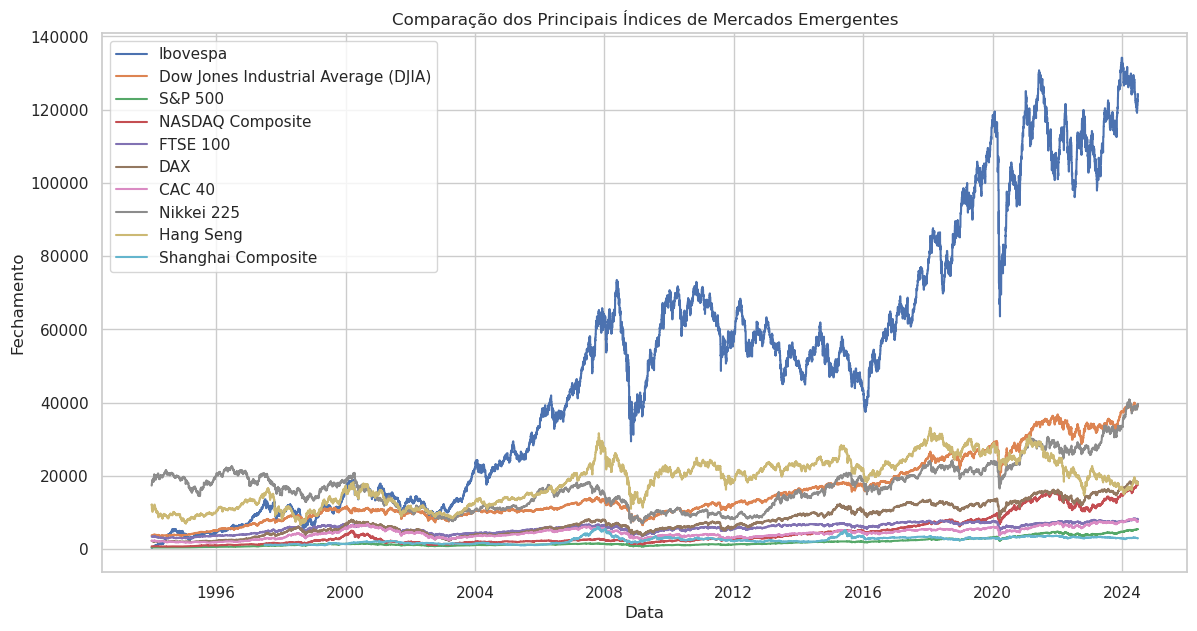

In [24]:
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico de linha usando Seaborn
plt.figure(figsize=(14, 7))
for index_name in combined_df.columns:
    sns.lineplot(x=combined_df.index, y=combined_df[index_name], label=index_name)

plt.title("Comparação dos Principais Índices de Mercados Emergentes")
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.legend()
plt.savefig("/mnt/data/comparacao_indices_seaborn.png")
plt.show()

In [25]:
import plotly.graph_objects as go

# Criar o gráfico interativo usando Plotly
fig = go.Figure()

for index_name in combined_df.columns:
    fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df[index_name], mode='lines', name=index_name))

fig.update_layout(
    title="Comparação dos Principais Índices de Mercados Emergentes",
    xaxis_title="Data",
    yaxis_title="Fechamento",
    legend=dict(x=0, y=1.0, traceorder='normal', font=dict(size=12)),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

#fig.write_html("/mnt/data/comparacao_indices_plotly.html")
fig.show()